# Kaggle Titanic competition

Main goal:Predict the survival of passengers



In [159]:
#File import
import pandas as pd
dataset = pd.read_csv('train.csv')


In [160]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Delete passengerId, Name and Cabin


In [161]:
dataset.drop(columns=['PassengerId','Name', 'Cabin', 'Ticket'], axis= 1, inplace=True)
dataset.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Fill missing data

In [162]:
size = dataset.shape
size


(891, 8)

In [163]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

# Filling Embarked Missing Values

In [164]:
Embark_values = dataset['Embarked'].value_counts()
Embark_values


S    644
C    168
Q     77
Name: Embarked, dtype: int64

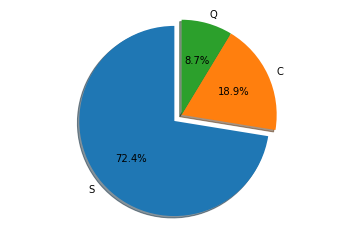

In [165]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'S', 'C', 'Q'
sizes = [644, 168, 77]
explode = (0.1, 0, 0)  # only "explode" the 1nd slice (i.e. 'S')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Then we can assume a 'most_frequent' strategy to fill the missing values

In [166]:
dataset['Embarked'].fillna('S', inplace=True)
dataset['Embarked'].head()
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [167]:
dataset.drop(columns=['Embarked'], axis= 1, inplace=True)
dataset.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [202]:
AgeData = dataset.groupby(['Age']).count()
AgeData.head()


,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,
0.42,1,3,0,1,8.5167
0.67,1,2,1,1,14.5000
0.75,2,6,4,2,38.5166
0.83,2,4,1,3,47.7500
0.92,1,1,1,2,151.5500


In [203]:
AgeData = dataset.groupby(['Age']).sum()
AgeData.head()

,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,
0.42,1,3,0,1,8.5167
0.67,1,2,1,1,14.5000
0.75,2,6,4,2,38.5166
0.83,2,4,1,3,47.7500
0.92,1,1,1,2,151.5500


In [169]:
import matplotlib.pyplot as plt
AgeData.drop(columns=['Pclass','SibSp', 'Parch', 'Fare'], axis= 1, inplace=True)


In [198]:
import numpy as np

#Compute relative frequency
Survival_Age_abs = AgeData.iloc[:,0].values
Values_sum = np.sum(Survival_Age_abs)
Values_sum

Survival_Age_rel = []
len(Survival_Age_abs)
Last_value = 0
for i in range(len(Survival_Age_abs)):
    
    Survival_Age_rel.append((Survival_Age_abs[i] / Values_sum) * 100 + Last_value )
    
    Last_value =(Survival_Age_abs[i] / Values_sum) * 100 + Last_value
   
#print(Survival_Age_rel)
AgeData['Survival_rel'] = pd.Series(Survival_Age_rel, index=AgeData.index)

AgeData



,Survived,Survival_rel
Age,,
0.42,1,0.344828
0.67,1,0.689655
0.75,2,1.379310
0.83,2,2.068966
0.92,1,2.413793
1.00,5,4.137931
2.00,3,5.172414
3.00,5,6.896552
4.00,7,9.310345


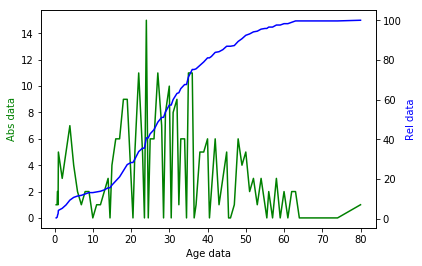

In [200]:
Age = AgeData.index.values

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Age, Survival_Age_abs, 'g-')
ax2.plot(Age, Survival_Age_rel, 'b-')

ax1.set_xlabel('Age data')
ax1.set_ylabel('Abs data', color='g')
ax2.set_ylabel('Rel data', color='b')

plt.show()



# Split into independent and dependent variables


In [171]:
#Create array for dependent variables
x = dataset.iloc[:, 1:].values
x

array([[3, 'male', 22.0, 1, 0, 7.25],
       [1, 'female', 38.0, 1, 0, 71.2833],
       [3, 'female', 26.0, 0, 0, 7.925],
       ...,
       [3, 'female', nan, 1, 2, 23.45],
       [1, 'male', 26.0, 0, 0, 30.0],
       [3, 'male', 32.0, 0, 0, 7.75]], dtype=object)

In [172]:
#table for results
y = dataset.iloc[:, 0].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# Fill Age Missing values
Lets try see correlation between age and other columns

In [173]:
dataset.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [174]:
dataset['Age'].corr(dataset['SibSp'])

-0.3082467589236563

In [175]:
dataset['Age'].corr(dataset['Parch'])

-0.18911926263203524

In [176]:
dataset['Age'].corr(dataset['Pclass'])

-0.36922601531551735

In [177]:
dataset['Age'].corr(dataset['Fare'])


0.09606669176903887

In [178]:
Parch_values = dataset['Parch'].value_counts()
Parch_values


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


##for i in [0,1,2,3,4,5,6]:
    filtered = dataset.loc[dataset['Parch'] == i]
    mean_value =filtered['Age'].mean()
    print(i, mean_value)
    filtered['Age'].fillna(mean_value)
    

In [179]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values= 'NaN', strategy= 'mean', axis= 0)
imputer = imputer.fit(x[:, 2:3])
x[:, 2:3] = imputer.transform(x[:, 2:3])
x



array([[3, 'male', 22.0, 1, 0, 7.25],
       [1, 'female', 38.0, 1, 0, 71.2833],
       [3, 'female', 26.0, 0, 0, 7.925],
       ...,
       [3, 'female', 29.69911764705882, 1, 2, 23.45],
       [1, 'male', 26.0, 0, 0, 30.0],
       [3, 'male', 32.0, 0, 0, 7.75]], dtype=object)

In [180]:
pd.notna(x)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       ...,
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

# Econding Categorical data
## Encoding sex data

In [181]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[: , 1] = labelencoder_x.fit_transform(x[: , 1])
x

array([[3, 1, 22.0, 1, 0, 7.25],
       [1, 0, 38.0, 1, 0, 71.2833],
       [3, 0, 26.0, 0, 0, 7.925],
       ...,
       [3, 0, 29.69911764705882, 1, 2, 23.45],
       [1, 1, 26.0, 0, 0, 30.0],
       [3, 1, 32.0, 0, 0, 7.75]], dtype=object)

# Split data into train and test data


In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


# Feature Scaling

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


/Users/tiagocabo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Models Fit
## RandomForest

In [184]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[124  15]
 [ 23  61]]


0.8295964125560538

# Logistic

In [185]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[138   1]
 [ 77   7]]


0.6502242152466368

# K-nears

In [186]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[88 51]
 [19 65]]


0.6860986547085202


# SVM

In [187]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[139   0]
 [ 84   0]]


0.6233183856502242